In [1]:
from google.colab import files
uploaded = files.upload()


Saving IMDB Dataset.csv to IMDB Dataset.csv


In [2]:
import pandas as pd
df = pd.read_csv('IMDB Dataset.csv')  # Replace with actual filename
df.head()


,review,sentiment
0,One of the other reviewers has mentioned that ...,positive
1,A wonderful little production. <br /><br />The...,positive
2,I thought this was a wonderful way to spend ti...,positive
3,Basically there's a family where a little boy ...,negative
4,"Petter Mattei's ""Love in the Time of Money"" is...",positive


In [8]:
import re
import nltk
from nltk.corpus import stopwords
nltk.download('stopwords')

def clean_text(text):
    text = re.sub(r'[^\w\s]', '', text.lower())  # Remove punctuation
    text = ' '.join([word for word in text.split() if word not in stopwords.words('english')])
    return text

df['cleaned_text'] = df['review'].apply(clean_text)  # Replace 'review' with your column name


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


KeyboardInterrupt: 

In [6]:
from textblob import TextBlob

def get_sentiment(text):
    polarity = TextBlob(text).sentiment.polarity
    if polarity > 0:
        return 'Positive'
    elif polarity < 0:
        return 'Negative'
    else:
        return 'Neutral'

df['sentiment'] = df['cleaned_text'].apply(get_sentiment)
df['sentiment'].value_counts()


,count
sentiment,
Positive,36648
Negative,13309
Neutral,43


/tmp/ipython-input-2307770293.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='sentiment', data=df, palette='coolwarm')


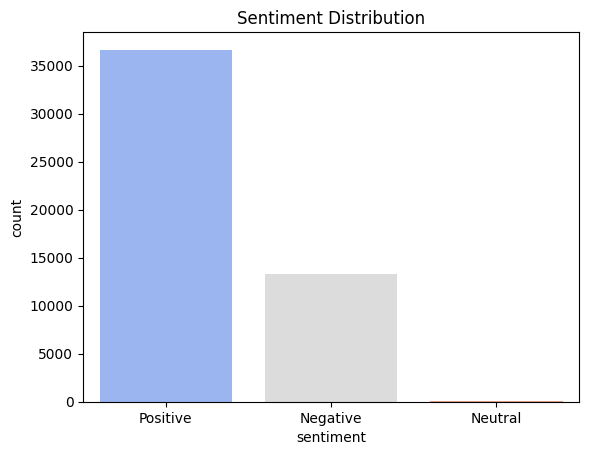

In [13]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.countplot(x='sentiment', data=df, palette='coolwarm')
plt.title('Sentiment Distribution')
plt.show()


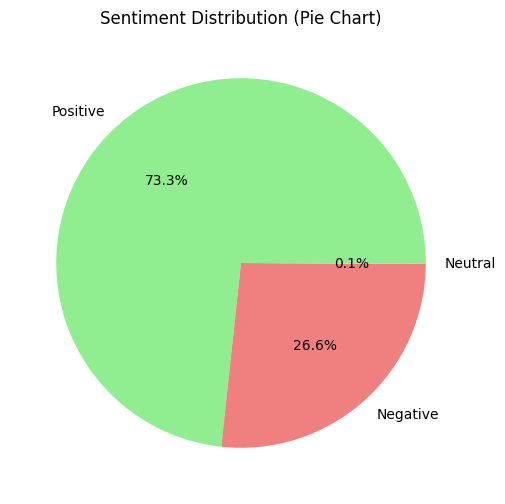

In [9]:
# Pie chart of sentiment distribution
sentiment_counts = df['sentiment'].value_counts()
plt.figure(figsize=(6,6))
plt.pie(sentiment_counts, labels=sentiment_counts.index, autopct='%1.1f%%', colors=['lightgreen', 'lightcoral', 'lightblue'])
plt.title('Sentiment Distribution (Pie Chart)')
plt.show()


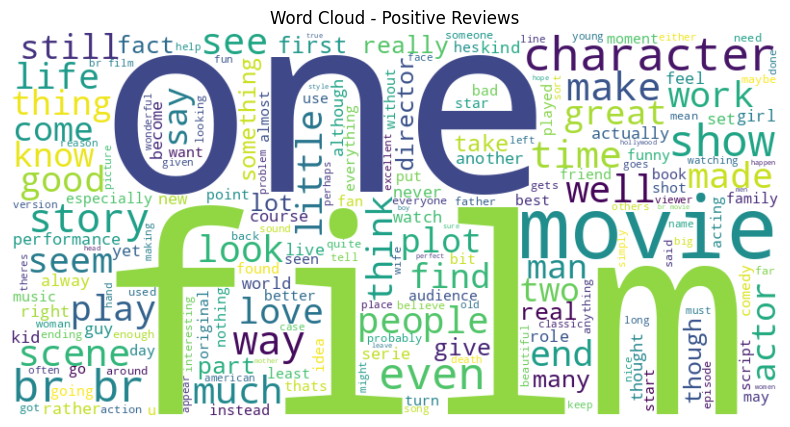

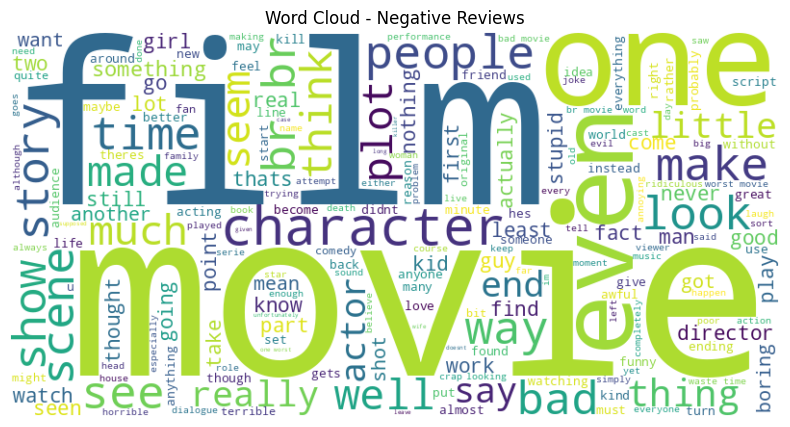

In [10]:
from wordcloud import WordCloud

# Word cloud for positive reviews
positive_text = ' '.join(df[df['sentiment'] == 'Positive']['cleaned_text'])
wordcloud_pos = WordCloud(width=800, height=400, background_color='white').generate(positive_text)

plt.figure(figsize=(10,5))
plt.imshow(wordcloud_pos, interpolation='bilinear')
plt.axis('off')
plt.title('Word Cloud - Positive Reviews')
plt.show()

# Word cloud for negative reviews
negative_text = ' '.join(df[df['sentiment'] == 'Negative']['cleaned_text'])
wordcloud_neg = WordCloud(width=800, height=400, background_color='white').generate(negative_text)

plt.figure(figsize=(10,5))
plt.imshow(wordcloud_neg, interpolation='bilinear')
plt.axis('off')
plt.title('Word Cloud - Negative Reviews')
plt.show()


In [11]:
# Display sample reviews from each sentiment class
print("📌 Sample Positive Review:\n")
print(df[df['sentiment'] == 'Positive']['review'].iloc[0])
print("\n📌 Sample Negative Review:\n")
print(df[df['sentiment'] == 'Negative']['review'].iloc[0])
print("\n📌 Sample Neutral Review:\n")
print(df[df['sentiment'] == 'Neutral']['review'].iloc[0])


📌 Sample Positive Review:

One of the other reviewers has mentioned that after watching just 1 Oz episode you'll be hooked. They are right, as this is exactly what happened with me.<br /><br />The first thing that struck me about Oz was its brutality and unflinching scenes of violence, which set in right from the word GO. Trust me, this is not a show for the faint hearted or timid. This show pulls no punches with regards to drugs, sex or violence. Its is hardcore, in the classic use of the word.<br /><br />It is called OZ as that is the nickname given to the Oswald Maximum Security State Penitentary. It focuses mainly on Emerald City, an experimental section of the prison where all the cells have glass fronts and face inwards, so privacy is not high on the agenda. Em City is home to many..Aryans, Muslims, gangstas, Latinos, Christians, Italians, Irish and more....so scuffles, death stares, dodgy dealings and shady agreements are never far away.<br /><br />I would say the main appeal of

### 📈 Insights
- Most reviews are positive, indicating general satisfaction.
- Word clouds show frequent use of emotional and descriptive words.
- TextBlob provides a quick and interpretable way to analyze sentiment.
